# K-Nearest Neighbors classifier

Implement the KNN classifier on the iris dataset using the Euclidean distance (L2-norm).

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use load_iris to load in the iris dataset
from sklearn.datasets import load_iris

%matplotlib inline

In [39]:
# Create an object of Bunch type, with data either in an ndarray or a dataframe
# A bunch object is a dictionary subclass that allows use of attribute notation for keys (e.g., bunch.key)
iris_arr = load_iris()
iris_df = load_iris(as_frame=True)

print(type(iris_arr.data))
print(type(iris_df.data))

print('Iris target (i.e., label) names:', iris_arr.target_names)
print('Iris feature names:', iris_df.feature_names)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
Iris target (i.e., label) names: ['setosa' 'versicolor' 'virginica']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [42]:
X, Y = iris_arr.data, iris_arr.target
print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#### Using shuffle to allow for randomization of data

Shuffle the data, but make sure that the features and accompanying labels stay in sync.


In [58]:
# Set the random seed that generates the pseudo-randomization function
np.random.seed(1)

# Use permutation to shuffle the data
print(X.shape[0], '\n') # Number of rows

# Set shuffle to be the randomized array of the values of 0-149 
shuffle = np.random.permutation(np.arange(X.shape[0]))
print(shuffle)
print(type(shuffle), '\n')
X_shuffled, Y_shuffled = X[shuffle], Y[shuffle]

# Check that the shuffling worked by using all to do a pairwise array element comparison
if (X_shuffled[0] == X[114]).all and (Y_shuffled[0].all == Y[114]).all:
    print("Nice shuffle!")

150 

[ 14  98  75  16 131  56 141  44  29 120  94   5 102  51  78  42  92  66
  31  35  90  84  77  40 125  99  33  19  73 146  91 135  69 128 114  48
  53  28  54 108 112  17 119 103  58 118  18   4  45  59  39  36 117 139
 107 132 126  85 122  95  11 113 123  12   2 104   6 127 110  65  55 144
 138  46  62  74 116  93 100  89  10  34  32 124  38  83 111 149  27  23
  67   9 130  97 105 145  87 148 109  64  15  82  41  80  52  26  76  43
  24 136 121 143  49  21  70   3 142  30 147 106  47 115  13  88   8  81
  60   0   1  57  22  61  63   7  86  96  68  50 101  20  25 134  71 129
  79 133 137  72 140  37]
<class 'numpy.ndarray'> 

Nice shuffle!


In [59]:
# FYI - When permutating on a multi-dimensional array, only the first index will shuffle
arr = np.arange(9).reshape((3, 3))
print(arr)
print()

permute = np.random.permutation(arr)
print(permute)

[[0 1 2]
 [3 4 5]
 [6 7 8]]

[[3 4 5]
 [6 7 8]
 [0 1 2]]


In [60]:
# Split into train and test
train_data, train_labels = X_shuffled[:100], Y_shuffled[:100]
test_data, test_labels = X_shuffled[100:], Y_shuffled[100:]

In [61]:
# Use the np.linalg.norm function to calculate the Ln Norm (default parameter of 2 = Euclidean distance)
def EuclideanDistance(v1, v2):
    return np.linalg.norm(v1 - v2) 

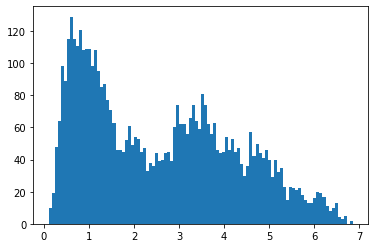

In [62]:
# Compute all pairwise distances in the training data and store it in the list to plot on a histogram
dists = []
for i in range(len(train_data) - 1):
    for j in range(i + 1, len(train_data)):
        dist = EuclideanDistance(train_data[i], train_data[j])
        dists.append(dist)
        
plt.hist(dists,100)
pass

In [63]:
# Create the 1-NN class 

class NearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self, metric=EuclideanDistance):
        self.metric = metric
    
    # No training for Nearest Neighbors. Just store the data.
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test example and return results.
    def predict(self, test_data):
        results = []
        for item in test_data:
            results.append(self._predict_item(item))
        return results
    
    # Private function for making a single prediction.
    def _predict_item(self, item):
        best_dist, best_label = 1.0e10, None
        for i in range(len(self.train_data)):
            dist = self.metric(self.train_data[i], item)
            if dist < best_dist:
                best_label = self.train_labels[i]
                best_dist = dist
        return best_label

In [64]:
# Create the NearestNeighbors object
clf = NearestNeighbors()

# Store the train data in the NearestNeighbors object
clf.fit(train_data, train_labels)

#  Predict the label for each data point in the test data based on the nearest neighbor from the train data
preds = clf.predict(test_data)

# For every prediction made, increment total by 1, and if the label was correct, increment correct by 1
correct, total = 0, 0

for pred, label in zip(preds, test_labels):
    if pred == label: 
        correct += 1
    total += 1
    
print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))

total:  50  correct:  46  accuracy: 0.92
